In [1]:
import pandas as pd

In [2]:
titanic=pd.read_csv('../input/titanic-dataset/Titanic.csv')

In [3]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
titanic['FamilySize'] = titanic['SibSp'] + titanic['Parch'] + 1

In [5]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  156 non-null    int64  
 1   Survived     156 non-null    int64  
 2   Pclass       156 non-null    int64  
 3   Name         156 non-null    object 
 4   Sex          156 non-null    object 
 5   Age          126 non-null    float64
 6   SibSp        156 non-null    int64  
 7   Parch        156 non-null    int64  
 8   Ticket       156 non-null    object 
 9   Fare         156 non-null    float64
 10  Cabin        31 non-null     object 
 11  Embarked     155 non-null    object 
 12  FamilySize   156 non-null    int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 16.0+ KB


In [6]:
titanic = titanic.drop(columns=['Ticket', 'PassengerId', 'Cabin'])

In [7]:
titanic.head(3)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,2
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,2
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,1


In [8]:
titanic['Sex'] = titanic['Sex'].map({'male':0, 'female':1})
titanic['Embarked'] = titanic['Embarked'].map({'C':0, 'Q':1, 'S':2})

In [9]:
titanic['Title'] = titanic['Name'].str.extract(' ([A-Za-z]+)\.', expand=False) #'expand=True, returns a dataframe'
titanic= titanic.drop(columns='Name')
titanic['Title']

0        Mr
1       Mrs
2      Miss
3       Mrs
4        Mr
       ... 
151     Mrs
152      Mr
153      Mr
154      Mr
155      Mr
Name: Title, Length: 156, dtype: object

In [10]:
titanic.Title.values

array(['Mr', 'Mrs', 'Miss', 'Mrs', 'Mr', 'Mr', 'Mr', 'Master', 'Mrs',
       'Mrs', 'Miss', 'Miss', 'Mr', 'Mr', 'Miss', 'Mrs', 'Master', 'Mr',
       'Mrs', 'Mrs', 'Mr', 'Mr', 'Miss', 'Mr', 'Miss', 'Mrs', 'Mr', 'Mr',
       'Miss', 'Mr', 'Don', 'Mrs', 'Miss', 'Mr', 'Mr', 'Mr', 'Mr', 'Mr',
       'Miss', 'Miss', 'Mrs', 'Mrs', 'Mr', 'Miss', 'Miss', 'Mr', 'Mr',
       'Miss', 'Mr', 'Mrs', 'Master', 'Mr', 'Mrs', 'Mrs', 'Mr', 'Mr',
       'Miss', 'Mr', 'Miss', 'Master', 'Mr', 'Miss', 'Mr', 'Master', 'Mr',
       'Master', 'Mrs', 'Mr', 'Miss', 'Mr', 'Mr', 'Miss', 'Mr', 'Mr',
       'Mr', 'Mr', 'Mr', 'Mr', 'Master', 'Miss', 'Mr', 'Mr', 'Miss', 'Mr',
       'Miss', 'Mrs', 'Mr', 'Mr', 'Miss', 'Mr', 'Mr', 'Mr', 'Mr', 'Mr',
       'Mr', 'Mr', 'Mr', 'Mr', 'Mrs', 'Mr', 'Miss', 'Mr', 'Mr', 'Mr',
       'Mr', 'Mr', 'Miss', 'Mr', 'Mr', 'Miss', 'Mr', 'Miss', 'Mr', 'Miss',
       'Miss', 'Mr', 'Mr', 'Mr', 'Mr', 'Miss', 'Mr', 'Mr', 'Mr', 'Miss',
       'Mr', 'Master', 'Mr', 'Mr', 'Miss', 'Mr', 'Mr', 'Mr'

In [11]:
titanic['Title'] = titanic['Title'].replace(['Rev', 'Don'], 'Others')
print(titanic['Title'])

0        Mr
1       Mrs
2      Miss
3       Mrs
4        Mr
       ... 
151     Mrs
152      Mr
153      Mr
154      Mr
155      Mr
Name: Title, Length: 156, dtype: object


In [12]:
titanic['Title'] = titanic['Title'].map({'Mr':1, 'Mrs':2 ,'Others':3 ,'Master':4 ,'Miss':5 })

In [13]:
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,Title
0,0,3,0,22.0,1,0,7.2500,2.0,2,1
1,1,1,1,38.0,1,0,71.2833,0.0,2,2
2,1,3,1,26.0,0,0,7.9250,2.0,1,5
3,1,1,1,35.0,1,0,53.1000,2.0,2,2
4,0,3,0,35.0,0,0,8.0500,2.0,1,1


In [14]:
titanic.isnull().sum()

Survived       0
Pclass         0
Sex            0
Age           30
SibSp          0
Parch          0
Fare           0
Embarked       1
FamilySize     0
Title          0
dtype: int64

In [15]:
titanic['Embarked'] = titanic['Embarked'].fillna(2)
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    156 non-null    int64  
 1   Pclass      156 non-null    int64  
 2   Sex         156 non-null    int64  
 3   Age         126 non-null    float64
 4   SibSp       156 non-null    int64  
 5   Parch       156 non-null    int64  
 6   Fare        156 non-null    float64
 7   Embarked    156 non-null    float64
 8   FamilySize  156 non-null    int64  
 9   Title       156 non-null    int64  
dtypes: float64(3), int64(7)
memory usage: 12.3 KB


In [16]:
titanic['Age']=titanic['Age'].fillna(titanic['Age'].median())



In [17]:
titanic.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age           0
SibSp         0
Parch         0
Fare          0
Embarked      0
FamilySize    0
Title         0
dtype: int64

In [18]:
titanic.dtypes

Survived        int64
Pclass          int64
Sex             int64
Age           float64
SibSp           int64
Parch           int64
Fare          float64
Embarked      float64
FamilySize      int64
Title           int64
dtype: object

In [19]:
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,Title
0,0,3,0,22.0,1,0,7.2500,2.0,2,1
1,1,1,1,38.0,1,0,71.2833,0.0,2,2
2,1,3,1,26.0,0,0,7.9250,2.0,1,5
3,1,1,1,35.0,1,0,53.1000,2.0,2,2
4,0,3,0,35.0,0,0,8.0500,2.0,1,1


In [20]:
X=titanic.iloc[:,1:10]
y=titanic.iloc[:,0]



In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import confusion_matrix,accuracy_score

<AxesSubplot:>

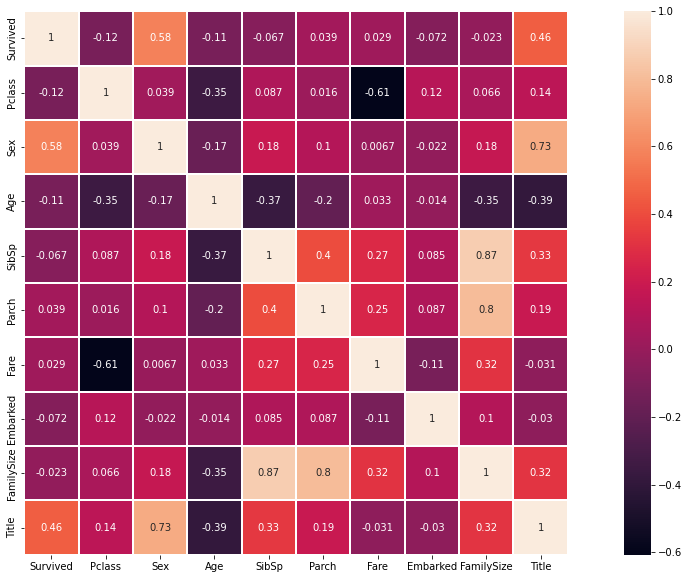

In [22]:
plt.figure(figsize=(20,10))
sns.heatmap(titanic.iloc[:,:10].corr(),annot=True, linewidths=2, square=True)

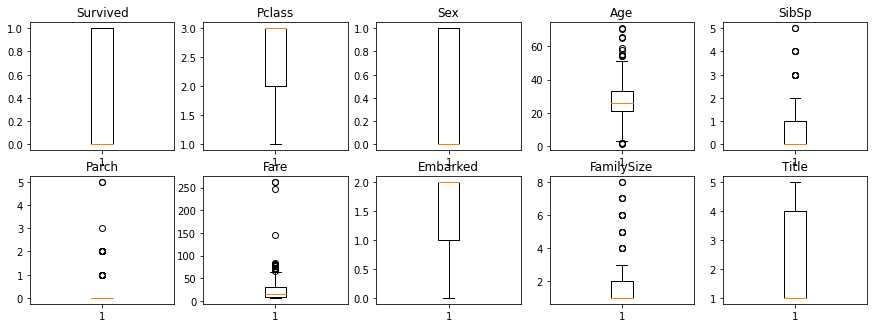

In [23]:
plt.figure(figsize=(15,8))
for i, column in enumerate(titanic.columns.values,1):
    plt.subplot(3,5,i)
    plt.boxplot(titanic[column])
    plt.title(column)
plt.show()

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
model=DecisionTreeClassifier()
model

DecisionTreeClassifier()

In [26]:
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [27]:
train_pred=model.predict(X_train)
test_pred=model.predict(X_test)
print(test_pred)

[0 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 1 0 0 0 0 1 0 1 1 0 0 1 0 0 0 1]


In [28]:
train_acc=accuracy_score(y_train,train_pred)
test_acc=accuracy_score(y_test,test_pred)

In [29]:
train_acc,test_acc

(1.0, 0.65625)

[Text(229.17857142857142, 522.6923076923077, 'X[1] <= 0.5\ngini = 0.453\nsamples = 124\nvalue = [81, 43]'),
 Text(139.5, 480.8769230769231, 'X[2] <= 23.5\ngini = 0.216\nsamples = 81\nvalue = [71, 10]'),
 Text(119.57142857142856, 439.0615384615385, 'gini = 0.0\nsamples = 24\nvalue = [24, 0]'),
 Text(159.42857142857142, 439.0615384615385, 'X[2] <= 34.5\ngini = 0.289\nsamples = 57\nvalue = [47, 10]'),
 Text(139.5, 397.2461538461539, 'X[8] <= 2.5\ngini = 0.394\nsamples = 37\nvalue = [27, 10]'),
 Text(119.57142857142856, 355.4307692307692, 'X[6] <= 1.5\ngini = 0.375\nsamples = 36\nvalue = [27, 9]'),
 Text(79.71428571428571, 313.61538461538464, 'X[5] <= 7.49\ngini = 0.133\nsamples = 14\nvalue = [13, 1]'),
 Text(59.78571428571428, 271.8, 'X[2] <= 27.25\ngini = 0.444\nsamples = 3\nvalue = [2, 1]'),
 Text(39.857142857142854, 229.98461538461538, 'X[5] <= 7.227\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(19.928571428571427, 188.1692307692308, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Tex

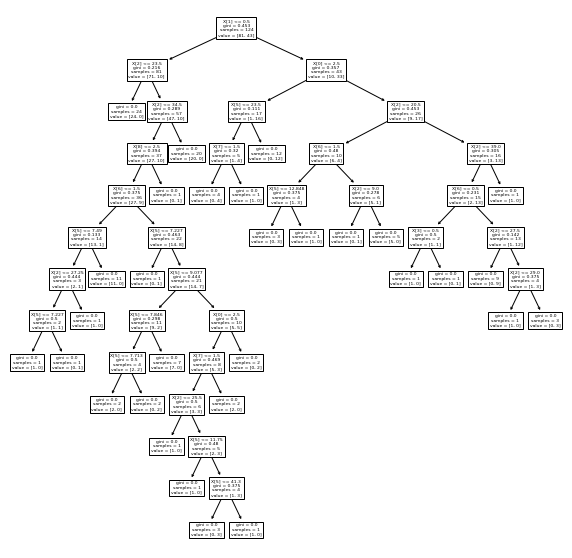

In [30]:
plt.figure(figsize=(10,10))
plot_tree(model)

In [31]:
param={'criterion':['gini','entropy'],'max_depth':[1,2,3,4,5,6,7,8]}
model_cv=GridSearchCV(model,param_grid=param)
model_cv.fit(X_train,y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8]})

In [32]:
model_cv.best_score_

0.8383333333333335

In [33]:
dt_model=model_cv.best_estimator_
print(dt_model)

DecisionTreeClassifier(max_depth=1)
